In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [25]:
dataset=pd.read_csv("Weather.csv")
dataset2=pd.read_csv('winequality.csv')

In [4]:
dataset.shape

(119040, 29)

In [5]:
dataset.describe()

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,102287.000000,532.000000,119040.000000,119040.000000,119040.000000,117833.000000,119040.000000,119040.000000,119040.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,3.753917,37.774534,27.045111,17.789511,22.411631,0.245544,43.805284,6.726016,15.797530,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,11.566633,10.297808,8.717817,8.334572,8.297982,2.626600,1.136718,3.425561,8.794541,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,0.000000,18.520000,-33.333333,-38.333333,-35.555556,0.000000,40.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,0.000000,29.632000,25.555556,15.000000,20.555556,0.000000,43.000000,4.000000,8.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,0.000000,37.040000,29.444444,21.111111,25.555556,0.000000,44.000000,7.000000,16.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,1.524000,43.059000,31.666667,23.333333,27.222222,0.000000,45.000000,10.000000,23.000000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,307.340000,75.932000,50.000000,34.444444,40.000000,86.360000,45.000000,12.000000,31.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


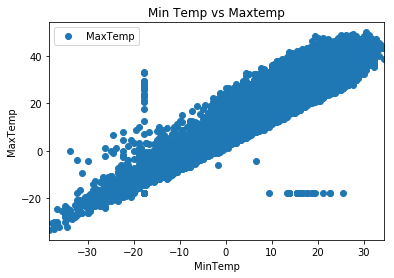

In [6]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('Min Temp vs Maxtemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

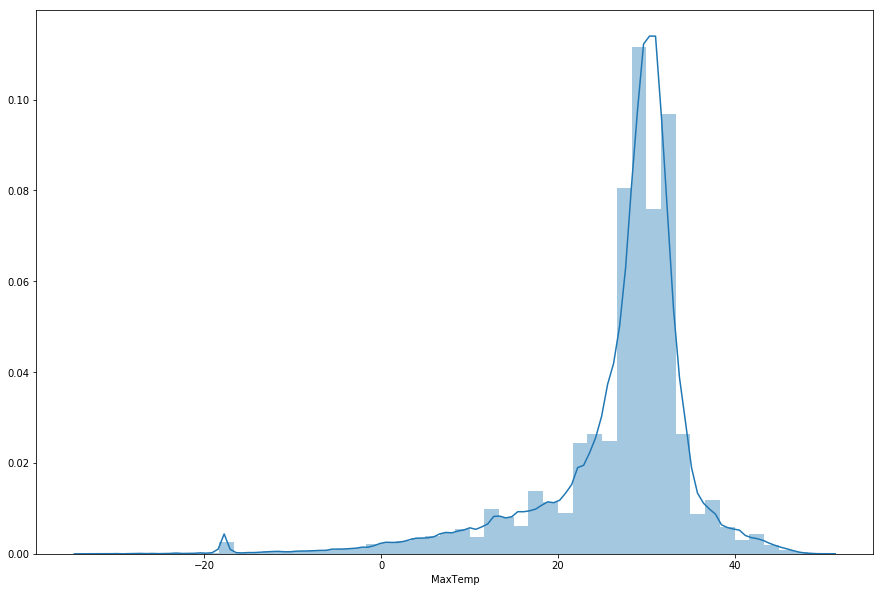

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['MaxTemp'])
plt.show()

In [10]:
X=dataset['MinTemp'].values.reshape(-1,1)
y=dataset['MaxTemp'].values.reshape(-1,1)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)#training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
#print the y-intercept
print(regressor.intercept_)
#print the slope
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [18]:
y_pred=regressor.predict(X_test)

In [21]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':
                y_pred.flatten()})
df.head()

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


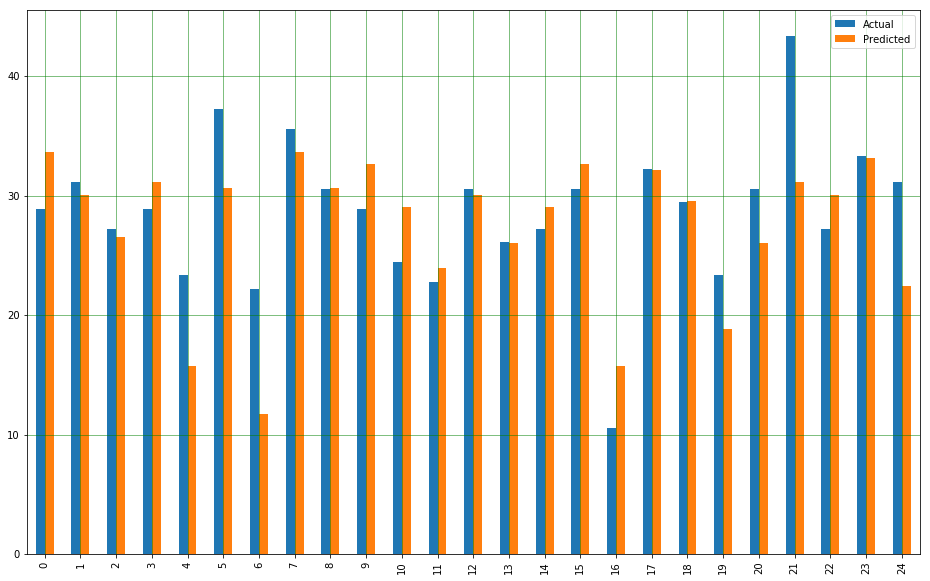

In [22]:
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

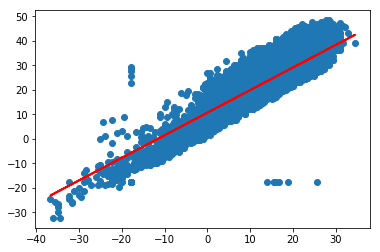

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [24]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.19932917837853
Mean Squared Error: 17.631568097568447
Root Mean Squared Error: 4.198996082109204


Now lets do some multiple linear regression!

In [26]:
dataset2.shape

(1599, 12)

In [27]:
dataset2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
dataset2.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [35]:
X=dataset2[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
           'density','pH','sulphates','alcohol']]
y=dataset2['quality']

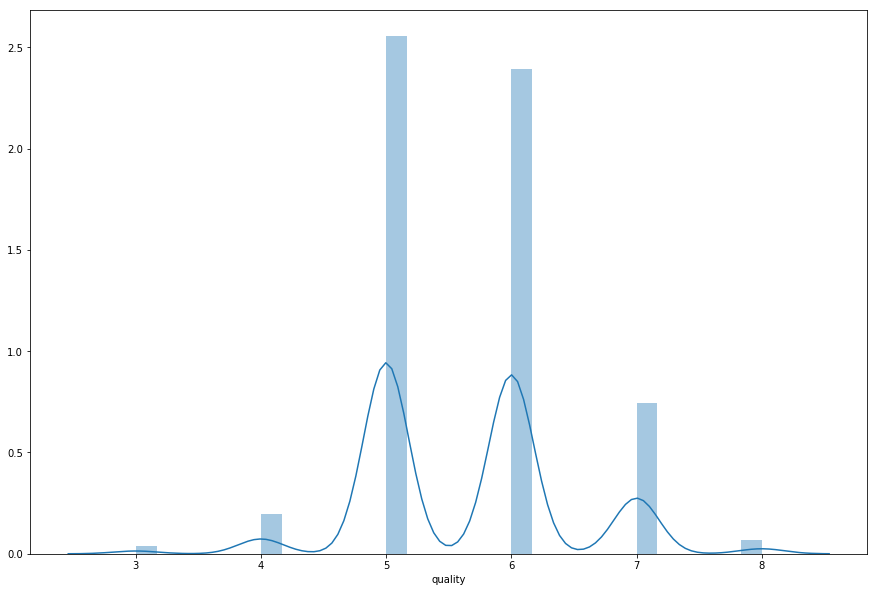

In [36]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset2['quality'])

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
coeff_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficent'])
coeff_df

,Coefficent
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [41]:
y_pred=regressor.predict(X_test)

In [46]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1=df.head(25)

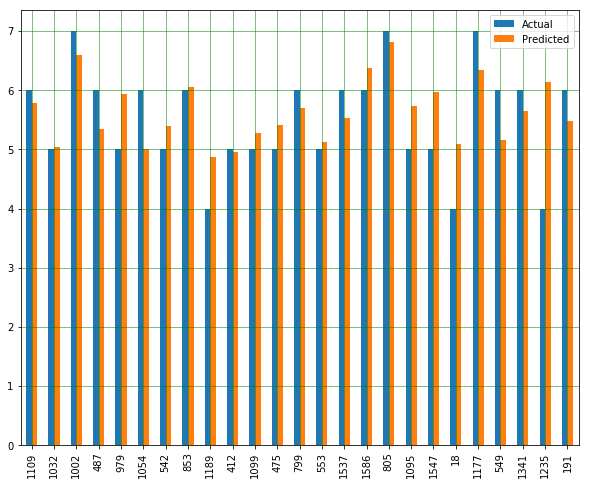

In [47]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [48]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.469633092866112
Mean Squared Error: 0.3844711978201256
Root Mean Squared Error: 0.6200574149384278


In [ ]:
# subplots in matplot lib
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5, density=False, cumulative=False, log=False)

In [1]:
# we don't want to plot the `student_id` column.
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))
plt.show()

NameError: name 'plt' is not defined

In [ ]:
def wrangle_grades():
    grades = pd.read_csv("data/student_grades.csv")
    grades.drop(columns='student_id', inplace=True)
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df

In [4]:
x=np.array([1,2,3,4,5])
y=np.array([1,3,5,5.5,6])

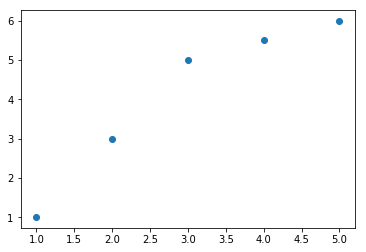

In [5]:
plt.scatter(x,y)